In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/master/dataset/Defense%20contractors%20market%20cap%2C%20revenue%2C%20earnings/defense%20contractor.csv")
data.head()

,Symbol,Year,Name,Country,Category,Market cap,Revenue,Earnings
0,AM.PA,2022,Dassault Aviation,France,Aircraft manufacturers|Defense contractors|Man...,$11.91 B,NaN,NaN
1,BA,2001,Boeing,USA,Aircraft manufacturers|Aerospace|Dow jones|Man...,$30.94 B,$58.19 B,NaN
2,BA,2002,Boeing,USA,Aircraft manufacturers|Aerospace|Dow jones|Man...,$26.37 B,$54.06 B,NaN
3,BA,2003,Boeing,USA,Aircraft manufacturers|Aerospace|Dow jones|Man...,$33.72 B,$50.48 B,NaN
4,BA,2004,Boeing,USA,Aircraft manufacturers|Aerospace|Dow jones|Man...,$43.08 B,$52.51 B,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Symbol      269 non-null    object
 1   Year        269 non-null    int64 
 2   Name        269 non-null    object
 3   Country     269 non-null    object
 4   Category    269 non-null    object
 5   Market cap  254 non-null    object
 6   Revenue     189 non-null    object
 7   Earnings    171 non-null    object
dtypes: int64(1), object(7)
memory usage: 16.9+ KB


In [4]:
data.nunique()

Symbol         17
Year           22
Name           17
Country         7
Category       12
Market cap    250
Revenue       184
Earnings      151
dtype: int64

In [5]:
data.isnull().sum().sort_values(ascending=False)

Earnings      98
Revenue       80
Market cap    15
Symbol         0
Year           0
Name           0
Country        0
Category       0
dtype: int64

In [6]:
data[data.isnull().any(axis=1)].head(10)

,Symbol,Year,Name,Country,Category,Market cap,Revenue,Earnings
0,AM.PA,2022,Dassault Aviation,France,Aircraft manufacturers|Defense contractors|Man...,$11.91 B,NaN,NaN
1,BA,2001,Boeing,USA,Aircraft manufacturers|Aerospace|Dow jones|Man...,$30.94 B,$58.19 B,NaN
2,BA,2002,Boeing,USA,Aircraft manufacturers|Aerospace|Dow jones|Man...,$26.37 B,$54.06 B,NaN
3,BA,2003,Boeing,USA,Aircraft manufacturers|Aerospace|Dow jones|Man...,$33.72 B,$50.48 B,NaN
4,BA,2004,Boeing,USA,Aircraft manufacturers|Aerospace|Dow jones|Man...,$43.08 B,$52.51 B,NaN
5,BA,2005,Boeing,USA,Aircraft manufacturers|Aerospace|Dow jones|Man...,$56.20 B,$54.84 B,NaN
6,BA,2006,Boeing,USA,Aircraft manufacturers|Aerospace|Dow jones|Man...,$70.07 B,$61.53 B,NaN
7,BA,2007,Boeing,USA,Aircraft manufacturers|Aerospace|Dow jones|Man...,$67.17 B,$66.38 B,NaN
8,BA,2008,Boeing,USA,Aircraft manufacturers|Aerospace|Dow jones|Man...,$31.00 B,$60.90 B,NaN
9,BA,2009,Boeing,USA,Aircraft manufacturers|Aerospace|Dow jones|Man...,$39.33 B,$68.28 B,NaN


In [7]:
data.Year = pd.to_datetime(data['Year'], format='%Y')
data['Year']=data.Year.dt.year
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Symbol      269 non-null    object
 1   Year        269 non-null    int64 
 2   Name        269 non-null    object
 3   Country     269 non-null    object
 4   Category    269 non-null    object
 5   Market cap  254 non-null    object
 6   Revenue     189 non-null    object
 7   Earnings    171 non-null    object
dtypes: int64(1), object(7)
memory usage: 16.9+ KB


In [8]:
data.Name = data.Name.astype('string')
data.Country = data.Country.astype('string')
data.Category = data.Category.astype('string')
data.Symbol = data.Symbol.astype('string')
data.Revenue = data.Revenue.astype("string")
array = data.Revenue.str.split("$",n = 1, expand = True)[:] 
data.Revenue = array[1] 
data.Revenue

0         <NA>
1      58.19 B
2      54.06 B
3      50.48 B
4      52.51 B
        ...   
264       <NA>
265       <NA>
266       <NA>
267       <NA>
268       <NA>
Name: Revenue, Length: 269, dtype: string

In [9]:
array = data.Revenue.str.split(" ",n = 1, expand = True)[:] 
data.Revenue = array[0]
data.Revenue

0       <NA>
1      58.19
2      54.06
3      50.48
4      52.51
       ...  
264     <NA>
265     <NA>
266     <NA>
267     <NA>
268     <NA>
Name: Revenue, Length: 269, dtype: string

In [10]:
data.Revenue = data.Revenue.astype("float64")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Symbol      269 non-null    string 
 1   Year        269 non-null    int64  
 2   Name        269 non-null    string 
 3   Country     269 non-null    string 
 4   Category    269 non-null    string 
 5   Market cap  254 non-null    object 
 6   Revenue     189 non-null    float64
 7   Earnings    171 non-null    object 
dtypes: float64(1), int64(1), object(2), string(4)
memory usage: 16.9+ KB


In [11]:
data

,Symbol,Year,Name,Country,Category,Market cap,Revenue,Earnings
0,AM.PA,2022,Dassault Aviation,France,Aircraft manufacturers|Defense contractors|Man...,$11.91 B,NaN,NaN
1,BA,2001,Boeing,USA,Aircraft manufacturers|Aerospace|Dow jones|Man...,$30.94 B,58.19,NaN
2,BA,2002,Boeing,USA,Aircraft manufacturers|Aerospace|Dow jones|Man...,$26.37 B,54.06,NaN
3,BA,2003,Boeing,USA,Aircraft manufacturers|Aerospace|Dow jones|Man...,$33.72 B,50.48,NaN
4,BA,2004,Boeing,USA,Aircraft manufacturers|Aerospace|Dow jones|Man...,$43.08 B,52.51,NaN
...,...,...,...,...,...,...,...,...
264,SAFRF,2018,Safran,France,CAC 40|Aerospace|Defense contractors,$52.36 B,NaN,NaN
265,SAFRF,2019,Safran,France,CAC 40|Aerospace|Defense contractors,$65.48 B,NaN,NaN
266,SAFRF,2020,Safran,France,CAC 40|Aerospace|Defense contractors,$60.88 B,NaN,NaN
267,SAFRF,2021,Safran,France,CAC 40|Aerospace|Defense contractors,$52.02 B,NaN,NaN


In [12]:
data.Earnings = data.Earnings.astype("string")
array = data.Earnings.str.split("$",n = 1, expand = True)[:]
data.Earnings = array[1]
array = data.Earnings.str.split(" ",n = 1, expand = True)[:]
data.Earnings = array[0]
data.Earnings =data.Earnings.astype('float64')


data['Market cap'] = data['Market cap'].astype('string')
array = data['Market cap'].str.split('$',n = 1, expand = True)[:]
data['Market cap'] = array[1]
array = data['Market cap'].str.split(" ",n=1,expand = True)[:]
data['Market cap']= array[0]
data['Market cap'] = pd.to_numeric(data['Market cap'],errors ='coerce').astype(np.float32)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Symbol      269 non-null    string 
 1   Year        269 non-null    int64  
 2   Name        269 non-null    string 
 3   Country     269 non-null    string 
 4   Category    269 non-null    string 
 5   Market cap  254 non-null    float32
 6   Revenue     189 non-null    float64
 7   Earnings    171 non-null    float64
dtypes: float32(1), float64(2), int64(1), string(4)
memory usage: 15.9 KB


In [13]:
data.groupby('Country')['Market cap'].max().sort_values(ascending=False).reset_index()

,Country,Market cap
0,USA,183.369995
1,Netherlands,114.339996
2,France,65.480003
3,UK,30.209999
4,Germany,7.220000
5,India,6.900000
6,Italy,NaN


In [14]:
data.groupby('Name')['Market cap'].max().sort_values(ascending=False).reset_index()

,Name,Market cap
0,Boeing,183.369995
1,Raytheon Technologies,149.970001
2,Honeywell,149.240005
3,Lockheed Martin,124.760002
4,Airbus,114.339996
5,Northrop Grumman,73.139999
6,General Dynamics,68.110001
7,Safran,65.480003
8,L3Harris Technologies,51.520000
9,BAE Systems,30.209999


Country
USA            183.369995
Netherlands    114.339996
France          65.480003
UK              30.209999
Germany          7.220000
India            6.900000
Italy                 NaN
Name: Market cap, dtype: float32
Name
Boeing                           183.369995
Raytheon Technologies            149.970001
Honeywell                        149.240005
Lockheed Martin                  124.760002
Airbus                           114.339996
Northrop Grumman                  73.139999
General Dynamics                  68.110001
Safran                            65.480003
L3Harris Technologies             51.520000
BAE Systems                       30.209999
Thales                            25.250000
Dassault Aviation                 11.910000
Huntington Ingalls Industries     10.660000
Rheinmetall                        7.220000
Bharat Electronics                 6.900000
Hindustan Aeronautics                   NaN
Leonardo                                NaN
Name: Market cap, dtype:

Text(0.5, 0, 'Market Capital')

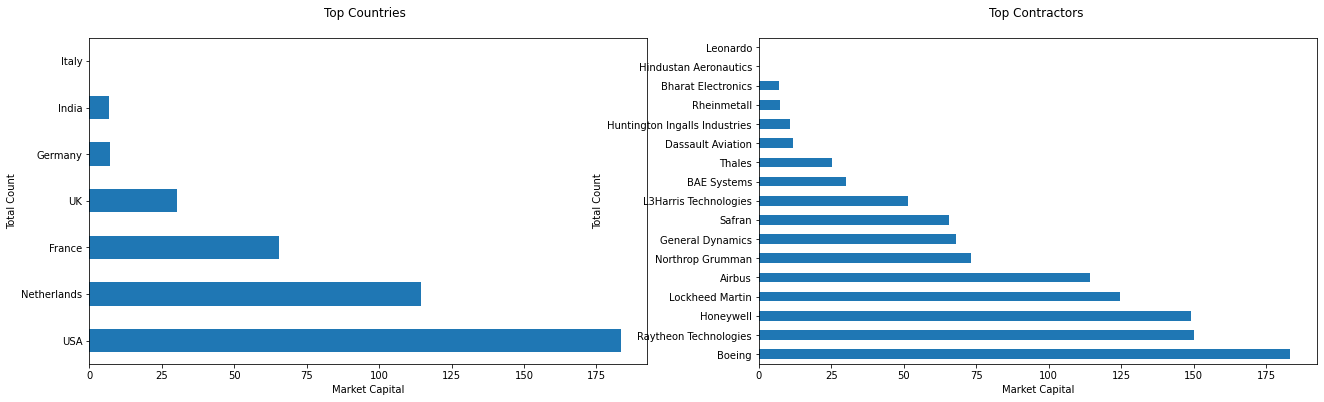

In [15]:
plt.figure(figsize=(22,6))
plt.subplot(1, 2, 1)
TopFiveManufacturingSite=data.groupby('Country')['Market cap'].max().sort_values(ascending=False)
print(TopFiveManufacturingSite)
TopFiveManufacturingSite.plot(kind='barh')
plt.title('Top Countries  \n')
plt.ylabel('Total Count')
plt.xlabel('Market Capital')

plt.subplot(1, 2, 2)
TopFiveManufacturingSite=data.groupby('Name')['Market cap'].max().sort_values(ascending=False)
print(TopFiveManufacturingSite)
TopFiveManufacturingSite.plot(kind='barh')
plt.title('Top Contractors \n')
plt.ylabel('Total Count')
plt.xlabel('Market Capital')

([<matplotlib.axis.XTick at 0x7fde1cfd6e10>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

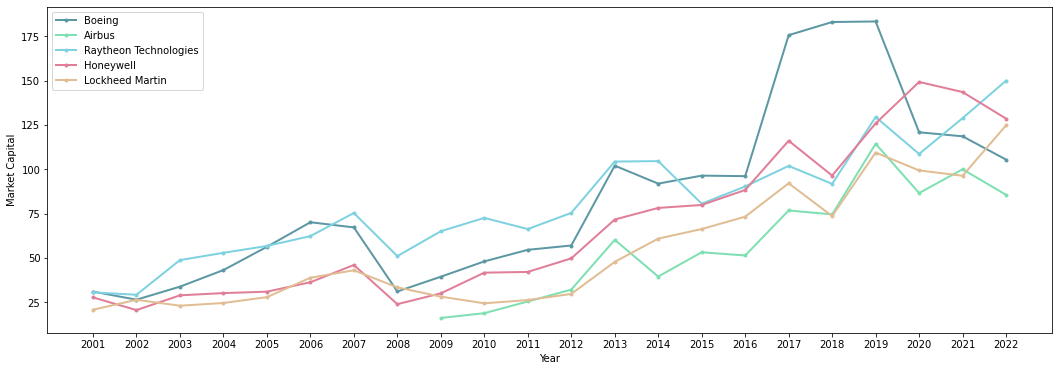

In [16]:
temp3=data.copy()
temp3_Bo=temp3.loc[temp3['Name'].str.contains("Boeing", case=False)]
temp3_Ab=temp3.loc[temp3['Name'].str.contains("Airbus", case=False)]
temp3_RT=temp3.loc[temp3['Name'].str.contains("Raytheon Technologies", case=False)]
temp3_Hw=temp3.loc[temp3['Name'].str.contains("Honeywell", case=False)]
temp3_Lm=temp3.loc[temp3['Name'].str.contains("Lockheed Martin", case=False)]
plt.figure(figsize=(18,6))
plt.plot('Year','Market cap',data=temp3_Bo,color='#5C98A3', marker = ".", linewidth=2)
plt.plot('Year','Market cap',data=temp3_Ab,color='#7EE0B2', marker = ".", linewidth=2)
plt.plot('Year','Market cap',data=temp3_RT,color='#7ED2E0', marker = ".", linewidth=2)
plt.plot('Year','Market cap',data=temp3_Hw,color='#E07E98', marker = ".", linewidth=2)
plt.plot('Year','Market cap',data=temp3_Lm,color='#E0BD93', marker = ".", linewidth=2)

plt.legend(["Boeing", "Airbus",'Raytheon Technologies','Honeywell','Lockheed Martin'], loc ="upper left")
plt.xlabel('Year', fontsize=10)
plt.ylabel('Market Capital', fontsize=10)
plt.xticks(temp3_Bo['Year'])